### Hamoye Quiz 3
#### Managing the Quality Metric of Global Ecological Footprint

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import  LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve


In [2]:
# stab column is dropped because it is related to stabf, where stab =< 0, stabf will be "unstable" and vice versa.
df = pd.read_csv('Data_for_UCI_named.csv').drop(columns='stab')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [4]:
# converting the stabf column to 1 and 0, and setting x as the predictor set and y as the predicted set
label = LabelEncoder()
df['stabf'] = label.fit_transform(df['stabf'])
x = df.drop(columns='stabf')
y = df['stabf']

In [5]:
# Splitting the data into training and testing in the ratio 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [6]:
# to normalize the values into a standard form so all data points are on a similar scale, so that model will be more accurate.
scaler = StandardScaler()

x_train_sc = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_sc = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

* Cost = 6 * FP + FN
* Recall = TP / (TP + FN)
* False Positive Rate (FPR) = FP / (FP + TN)

In [7]:
def recall(tp, fn):
    res = tp / (tp +fn)
    return res * 100

def fpr(fp, tn):
    res = fp / (fp + tn)
    return round(res * 100, 2)

def cost(fp, fn):
    res = 6 * fp + fn
    return res
    

In [8]:
# Opt A
print(recall(79, 21))
print(fpr(1, 99))
print(cost(1, 21))
print('='*10)

# Opt B
print(recall(90, 10))
print(fpr(4, 96))
print(cost(1, 10))
print('='*10)

# Opt C
print(recall(78, 22))
print(fpr(9, 91))
print(cost(1, 22))
print('='*10)

# Opt D
print(recall(82, 18))
print(fpr(2, 98))
print(cost(1, 18))
print('='*10)

79.0
1.0
27
90.0
4.0
16
78.0
9.0
28
82.0
2.0
24


Option B is correct

In [9]:
TP = 255
TN = 20
FP = 1380
FN = 45

In [10]:
prec = TP/(TP + FP)
rec = TP/(TP + FN)
f1 = 2 * (prec * rec) / (prec + rec)
round(f1, 4)

0.2636

#### RANDOM FOREST CLASSIFIER

In [11]:
rdfrst = RandomForestClassifier(random_state=1)
rdfrst.fit(x_train_sc, y_train)
pred =rdfrst.predict(x_test_sc)
acc = accuracy_score(y_test, pred)
acc

0.928

In [12]:
print(classification_report(y_test, pred, digits=6))

              precision    recall  f1-score   support

           0   0.917647  0.876404  0.896552       712
           1   0.933333  0.956522  0.944785      1288

    accuracy                       0.928000      2000
   macro avg   0.925490  0.916463  0.920669      2000
weighted avg   0.927749  0.928000  0.927614      2000



#### XGBOOST CLASSIFIER

In [13]:
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train_sc, y_train)
pred = xgb.predict(x_test_sc)
acc = accuracy_score(y_test, pred)
acc

0.946

In [14]:
print(classification_report(y_test, pred, digits=6))


              precision    recall  f1-score   support

           0   0.937681  0.908708  0.922967       712
           1   0.950382  0.966615  0.958430      1288

    accuracy                       0.946000      2000
   macro avg   0.944031  0.937661  0.940698      2000
weighted avg   0.945860  0.946000  0.945805      2000



#### LGBN CLASSIFIER

In [15]:
lgb = LGBMClassifier(random_state=1)
lgb.fit(x_train_sc, y_train)
pred = lgb.predict(x_test_sc)
acc = accuracy_score(y_test, pred)
acc

0.9365

In [16]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyp_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [17]:
extree = ExtraTreesClassifier(random_state=1)

rand_se = RandomizedSearchCV(extree, hyp_grid, 
                             cv=5, n_iter=10,
                             scoring='accuracy', n_jobs=-1,
                             verbose=1, random_state=1)
res = rand_se.fit(x_train_sc, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [18]:
res.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [19]:
model = res.best_estimator_
model

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [20]:
model.fit(x_train_sc, y_train)
pred = model.predict(x_test_sc)
acc = accuracy_score(y_test, pred)
acc

0.9285

In [21]:
feat_imp = model.feature_importances_
feat_imp


array([0.13723975, 0.1405075 , 0.13468029, 0.13541676, 0.00368342,
       0.00533686, 0.00542927, 0.00496249, 0.10256244, 0.10757765,
       0.11306268, 0.10954089])

<AxesSubplot:>

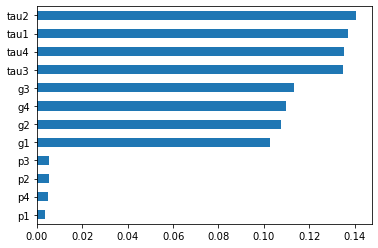

In [22]:
feat = pd.Series(feat_imp, x_train.columns).sort_values()
feat.plot(kind='barh')